## DATA INGESTION

STUDY AIM

The aim is to model is to predict the median_house_value which is our target variable


Overcome missing data with a basic unsupervised learning data imputation


Identification of outliers in a dataset


Understand how to turn a simple model into your own sklearn comparible class, our aim won't be to create the most perfect model

In [335]:
# importing all the necessaries libraries
import numpy as np
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt
import os 
import seaborn as sns

## Loading the dataset

In [336]:
df= pd.read_csv("Country-data.csv")

In [337]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## PREMILARY DATA ANALYSIS

In [338]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [339]:
df.shape

(167, 10)

In [340]:
# Checking out for missing value
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [341]:
df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

## Exploratory data analysis

Descriptive Data Analysis

In [342]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [344]:
num_col= df.select_dtypes(include="number").columns
num_col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [345]:
import math

def plot_all_histogram(df, title_prefix="**"):
    n_col= 3
    num_col= df.select_dtypes(include=[np.number]).columns
    num_rows = math.ceil(len(num_col) / n_col)

    plt.Figure(figsize=(5 * n_col, 4 * num_rows))


    for i, col  in enumerate(num_col, 1):
        plt.subplot(num_rows, n_col, i)
        sns.histplot(df[col],kde=True, bins=30)
        plt.title(f"{title_prefix} {col}")
        plt.xlabel("")
        plt.ylabel("")


    plt.tight_layout()
    plt.show()





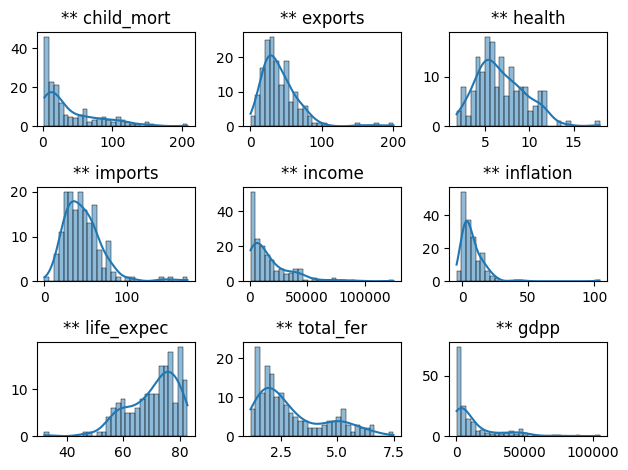

In [346]:
plot_all_histogram(df)

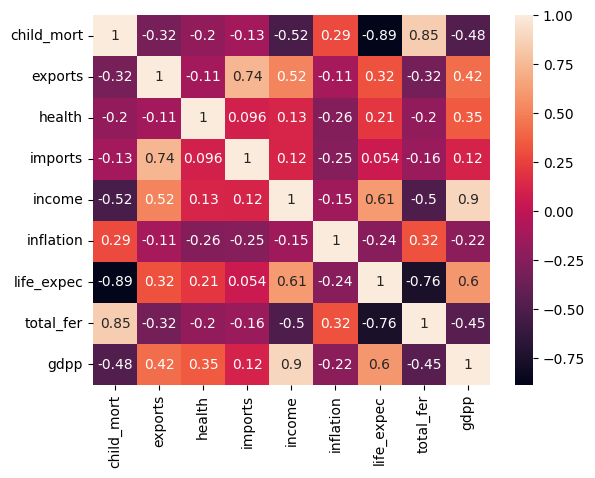

In [347]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [348]:
# from the above we can conclude
#gdpp and income,imports and exports,child_mort and total_fert are highly positive correlated
#whereas life_expec and child_mort are highly negative correlated

In [349]:
data= df.drop("country", axis=1)

In [350]:
data.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [351]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data= scaler.fit_transform(data)

In [352]:
# data.columns

In [353]:
data = pd.DataFrame(data, columns=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp'])

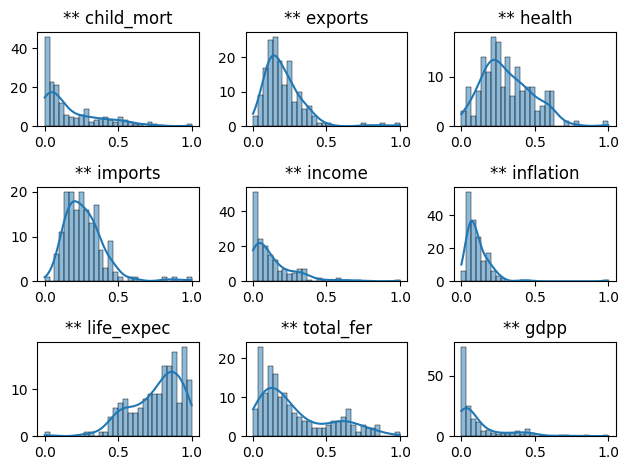

In [354]:
plot_all_histogram(data)

From above  we can see that their are so many outliers in our dataset.Most of the outliers are in income per person,GDP per captia and Exports.Now we can remove the outliers but we are not going to do it as our dataset is very small (167 rows only)

In [355]:
from sklearn.decomposition import PCA
pca= PCA()
pca_data = pd.DataFrame(pca.fit_transform(data))

In [356]:
pca_data

,0,1,2,3,4,5,6,7,8
0,0.599078,0.095490,0.157554,0.024333,0.045618,-0.046532,-0.076803,-0.040610,0.023572
1,-0.158474,-0.212092,-0.064189,0.061247,-0.014191,-0.010246,0.043567,-0.030842,0.029833
2,-0.003686,-0.135867,-0.134182,-0.133574,0.091150,0.025988,0.045604,0.010198,0.003012
3,0.650235,0.275975,-0.142672,-0.156018,0.081997,0.032170,0.073985,0.045195,-0.042241
4,-0.200711,-0.064662,-0.100715,0.037902,0.035799,-0.055817,0.009559,-0.026228,0.022455
...,...,...,...,...,...,...,...,...,...
162,0.160078,-0.029625,-0.121910,0.066099,0.009043,-0.063646,-0.115254,0.003232,-0.065701
163,-0.061133,-0.171339,-0.058586,-0.247460,0.093260,0.291515,-0.005521,-0.056038,-0.036459
164,-0.115512,-0.032034,-0.195243,0.231993,0.035734,0.089237,0.039743,0.006124,-0.017780
165,0.332968,-0.019824,-0.029989,-0.105416,0.141550,0.063254,-0.012519,-0.014231,-0.011441


In [357]:
pca.explained_variance_ratio_

array([0.55001227, 0.13384784, 0.12301053, 0.09749047, 0.03777964,
       0.03013659, 0.01190434, 0.00887791, 0.00694042])

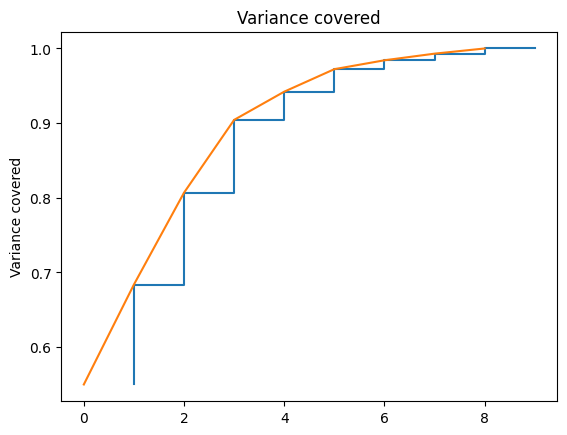

In [358]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Variance covered")
plt.title("Variance covered")
plt.show()

In [359]:
pca_data = pca_data.drop(columns = [3,4,5,6,7,8])


In [360]:
pca_data

,0,1,2
0,0.599078,0.095490,0.157554
1,-0.158474,-0.212092,-0.064189
2,-0.003686,-0.135867,-0.134182
3,0.650235,0.275975,-0.142672
4,-0.200711,-0.064662,-0.100715
...,...,...,...
162,0.160078,-0.029625,-0.121910
163,-0.061133,-0.171339,-0.058586
164,-0.115512,-0.032034,-0.195243
165,0.332968,-0.019824,-0.029989


Scaling data

Our dataset is not scaled some values are much bigger than others,if we will not scale our data our model will not going to perform well.So now we are are going to scale our data for this we are going to use a StandardScaler library
StandardScaler transform the data such the the mean will be 0 and variance will be 1.

Note:- Scaling data is necessary just for the algorithms which is based on the distance like K-means clustering and Hierarchical clustering

In [361]:
from sklearn.discriminant_analysis import StandardScaler


scaling=StandardScaler()
scaled=scaling.fit_transform(data)

In [362]:
scaled_df=pd.DataFrame(scaled, columns=data.columns)

scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


K-Means Clustering

K-means Clustering is the most popular unsupervised machine learning algorithm.It is a centroid-based or distance-based algorithm.The woking of the alorithms is as follows:

First we initialize k points called means randomly
Then we categorize each item to its closest mean and we update the mean's coordinates,which are the averages of the items categorized in the mean so far
We repeat the process for a given number of iteartions and at the end,we have our clusters
To decide how many number of clusters consider we are going to use a most popular elbow method

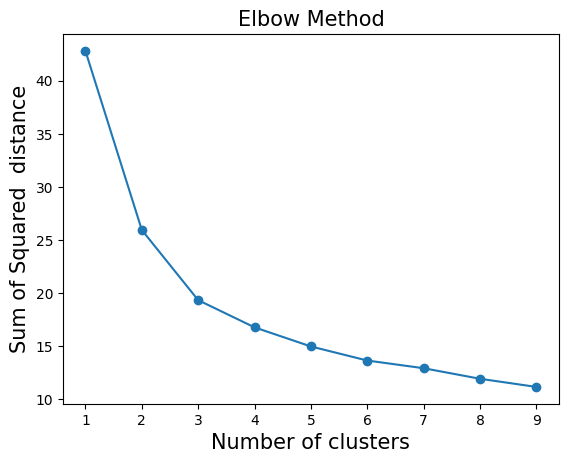

In [363]:
from sklearn.cluster import KMeans


a= []
K=range(1, 10)
for i in K:
    Kmeans=KMeans(n_clusters=i)
    Kmeans.fit(data)
    a.append(Kmeans.inertia_)

plt.plot(K, a, marker='o')
plt.title('Elbow Method', fontsize=15)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('Sum of Squared  distance', fontsize=15)
plt.show()

As we can see the elbow or a knee like bend is at 3.So choosing 3 as a number of clusters

In [364]:
Kmeans = KMeans(n_clusters=3, random_state=234)
Kmeans.fit(scaled_df)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,234
,copy_x,True
,algorithm,'lloyd'


In [365]:
# we are going to check how our model is,using Silhouette Coefficient

# The Silhouette Coefficient measures how well-separated clusters are in a dataset, ranging from -1 to +1, where a score near +1 means good clustering (points are close to their own cluster, far from others)
#  and near 0 or -1 suggests poor clustering, possibly indicating points are on boundaries or misassigned

#calculate how good our model is
#calculate Silhouette Coefficient for K=3

from sklearn import metrics


metrics.silhouette_score(scaled_df, Kmeans.labels_)

0.28329575683463126

## Prediction

In [366]:
# Predicting values
cluster_labels= Kmeans.fit_predict(scaled_df)

In [367]:
preds = Kmeans.labels_
kmeans_df = pd.DataFrame(df)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [368]:
# save a Kmeans file
kmeans_df.to_csv('Kmeans_result.csv', index=False)

# Visualization of clusters

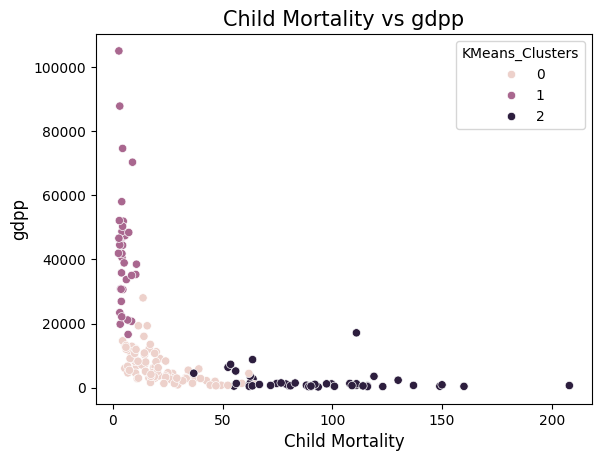

In [369]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(x=kmeans_df['child_mort'], y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

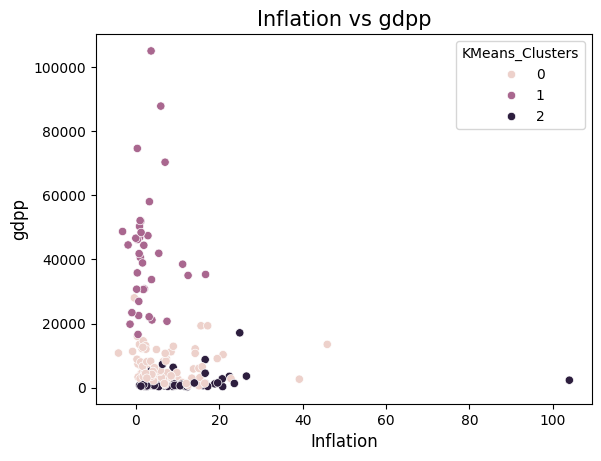

In [370]:
# Visuliazation of clusters inflation vs gdpp
sns.scatterplot(x=kmeans_df['inflation'], y=kmeans_df['gdpp'], hue='KMeans_Clusters', data=kmeans_df)
plt.title("Inflation vs gdpp", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

From above two clusters graph we can conclude that

Country having high child-mortality, low GDP per capital and low inflation(The measurement of the annual growth rate of the Total GDP) is a under-developing country


Country having low child-mortality, high gdpp and high infaltion is the developed country


So here we conclude that
0 = under-developing country


1 = developing country


2 = developed country

In [371]:
# To get the total ration of the under developed , under-developed, and developing country 

under_developing_county= kmeans_df[kmeans_df['KMeans_Clusters']==0]['country']
developing_country= kmeans_df[kmeans_df['KMeans_Clusters']==1]['country']
developed_country=kmeans_df[kmeans_df['KMeans_Clusters']==2]['country']


print("Number of under Developed Country" , {len(under_developing_county)})
print("Number of developing country", {len(developing_country)})
print("Number of developed country", {len(developed_country)})


Number of under Developed Country {84}
Number of developing country {36}
Number of developed country {47}


In [372]:
# Now let us get the list of developed country
list(developed_country)

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [373]:
# Now let us get the list of developing_country 
list(developing_country)

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [374]:
# Now let us get the list of under_developing_country
list(under_developing_county)

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Th

In [375]:
# let us check if some particular countries are present in their varoious groups
for i in developing_country:
    if i == 'Canada':
        print('Yes', i ,'is present in developing country list')

Yes Canada is present in developing country list


In [376]:
for i in under_developing_county:
    if i == 'Brazil':
        print('Yes', i ,'is present in under-developing country list')

Yes Brazil is present in under-developing country list


In [377]:
for i in developing_country:
    if i == 'Japan':
        print('Yes', i , 'is present in developing coutry list')

Yes Japan is present in developing coutry list


Hierarchical Clustering


Also called Hierarchical cluster analysis or HCA is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom. This clustering technique is divided into two types:

Agglomerative Hierarchical Clustering


Divisive Hierarchical Clustering


Agglomerative Hierarchical Clustering




The Agglomerative Hierarchical Clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). It's a “bottom-up” 




approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.



Dendogram


A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

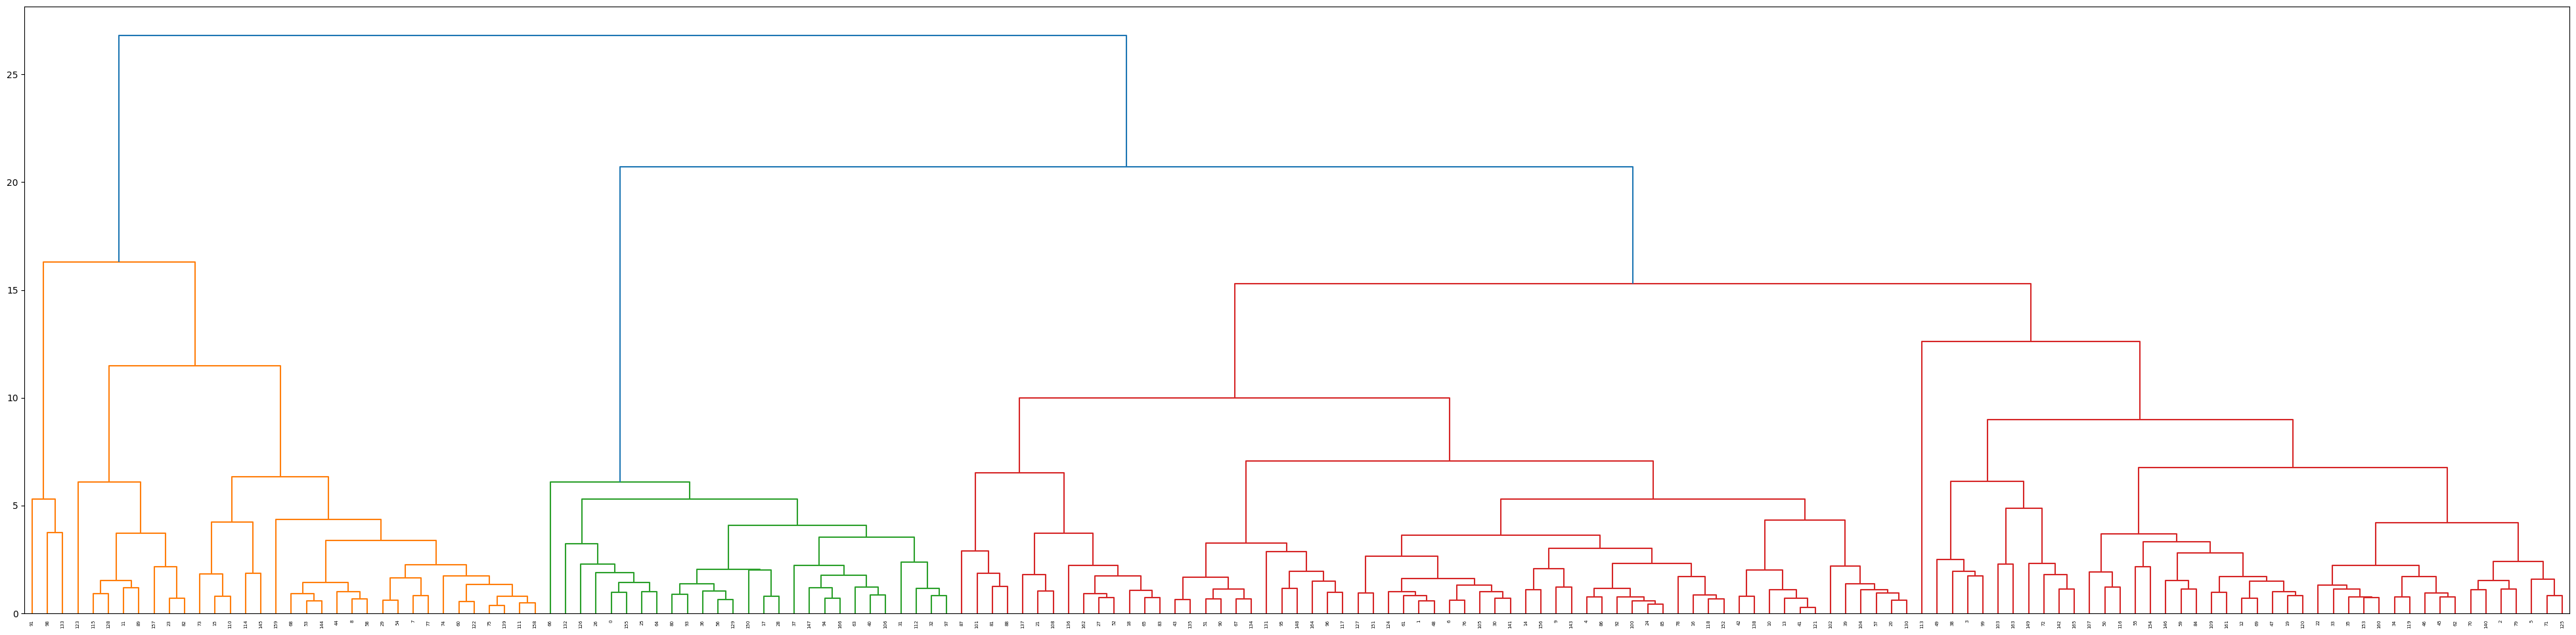

In [378]:
# ploting dengogram
import scipy.cluster.hierarchy as hcluster
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(scaled_df, method='ward'))

From above dendogram we can take minimum no of clusters as 2 and maximum number of cluster as 5.


As we can see fro dendogram 3 in the the right no of clusters ,so we are going to take 3 no of clusters

In [379]:
# Getting labels from Agglomearative Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering


hcluster = AgglomerativeClustering(n_clusters=3, linkage='ward')  
hcluster.fit_predict(scaled_df)
hcluster_label = hcluster.labels_

In [380]:
hcluster_df = pd.DataFrame(df)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


# Visualising hcluster

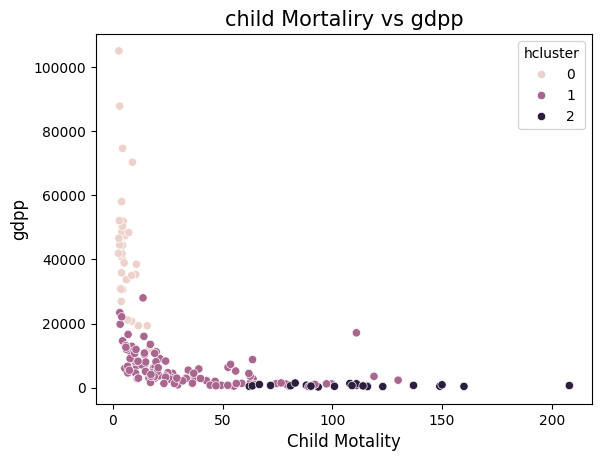

In [381]:
# Visulazing hcluster results

# child mortality vs exports

sns.scatterplot(x=hcluster_df['child_mort'],y=hcluster_df['gdpp'], hue='hcluster', data=hcluster_df)
plt.title("child Mortaliry vs gdpp", fontsize=15)
plt.xlabel("Child Motality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

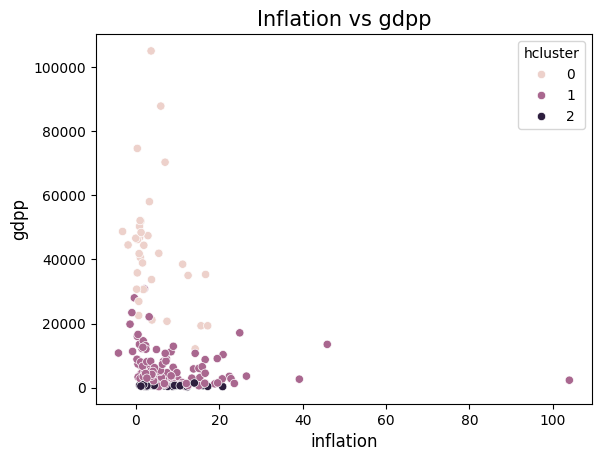

In [382]:
# Visulazing hcluster results

# child Inflation vs gdpp
sns.scatterplot(x=hcluster_df['inflation'],y=hcluster_df['gdpp'], hue='hcluster', data=hcluster_df)
plt.title("Inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()



From above we can conclude that:-


0 = developed country


1 = developing country


2 = under-developing country

In [385]:
under_developing_county= hcluster_df[hcluster_df['hcluster']==0]['country']
developing_country= hcluster_df[hcluster_df['hcluster']==1]['country']
developed_country=hcluster_df[hcluster_df['hcluster']==2]['country']


print("Number of under Developed Country" , {len(under_developing_county)})
print("Number of developing country", {len(developing_country)})
print("Number of developed country", {len(developed_country)})

Number of under Developed Country {34}
Number of developing country {106}
Number of developed country {27}
